# Import libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# Obtain Data

In [56]:
df = pd.read_csv('nba_draft_combine.csv')
df.drop(columns=['Unnamed: 0','Player','Year','Draft pick'], inplace=True)
df.head()

,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


# Scrub Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Height (No Shoes)         517 non-null    float64
 1   Height (With Shoes)       516 non-null    float64
 2   Wingspan                  517 non-null    float64
 3   Standing reach            517 non-null    float64
 4   Vertical (Max)            450 non-null    float64
 5   Vertical (Max Reach)      450 non-null    float64
 6   Vertical (No Step)        450 non-null    float64
 7   Vertical (No Step Reach)  450 non-null    float64
 8   Weight                    516 non-null    float64
 9   Body Fat                  514 non-null    float64
 10  Hand (Length)             470 non-null    float64
 11  Hand (Width)              468 non-null    float64
 12  Bench                     284 non-null    float64
 13  Agility                   444 non-null    float64
 14  Sprint    

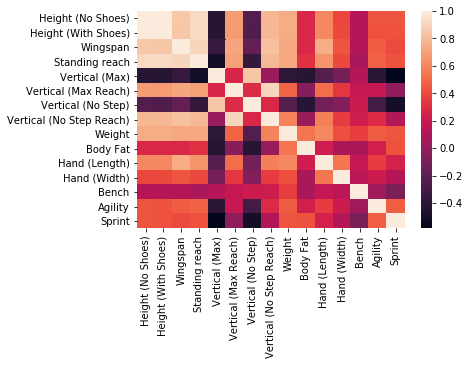

In [58]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [59]:
df.drop(columns=['Bench','Height (With Shoes)', 'Vertical (Max Reach)', 'Vertical (No Step)',
                 'Vertical (No Step Reach)','Standing reach'], inplace=True)
df.dropna(inplace=True)

AxesSubplot(0.125,0.125;0.62x0.755)


,Height (No Shoes),Wingspan,Vertical (Max),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
Height (No Shoes),1.000000,0.849543,-0.429775,0.747132,0.247840,0.600355,0.377972,0.417923,0.416992
Wingspan,0.849543,1.000000,-0.370260,0.734279,0.245683,0.725711,0.418841,0.435748,0.378266
Vertical (Max),-0.429775,-0.370260,1.000000,-0.430656,-0.440702,-0.235187,-0.109179,-0.427659,-0.618880
Weight,0.747132,0.734279,-0.430656,1.000000,0.532236,0.592382,0.400539,0.457255,0.441118
Body Fat,0.247840,0.245683,-0.440702,0.532236,1.000000,0.171763,0.029072,0.249271,0.457043
Hand (Length),0.600355,0.725711,-0.235187,0.592382,0.171763,1.000000,0.529326,0.346003,0.243111
Hand (Width),0.377972,0.418841,-0.109179,0.400539,0.029072,0.529326,1.000000,0.201485,0.124625
Agility,0.417923,0.435748,-0.427659,0.457255,0.249271,0.346003,0.201485,1.000000,0.453195
Sprint,0.416992,0.378266,-0.618880,0.441118,0.457043,0.243111,0.124625,0.453195,1.000000


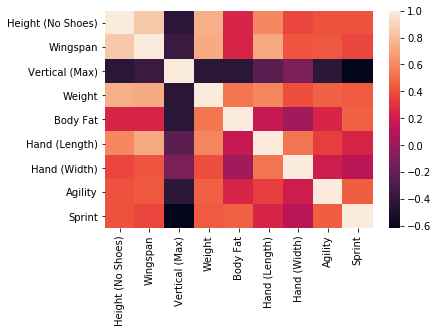

In [60]:
corr_matrix = df.corr()
print(sns.heatmap(corr_matrix))
corr_matrix

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 15 to 516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Height (No Shoes)  394 non-null    float64
 1   Wingspan           394 non-null    float64
 2   Standing reach     394 non-null    float64
 3   Vertical (Max)     394 non-null    float64
 4   Weight             394 non-null    float64
 5   Body Fat           394 non-null    float64
 6   Hand (Length)      394 non-null    float64
 7   Hand (Width)       394 non-null    float64
 8   Agility            394 non-null    float64
 9   Sprint             394 non-null    float64
dtypes: float64(10)
memory usage: 33.9 KB


# Model Data

In [65]:
ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)
x

array([[ 0.21597756,  0.5899984 ,  0.47534192, ..., -1.21679475,
        -0.20747095, -1.66747803],
       [-0.24316898, -0.84348802, -1.98713062, ..., -0.1967583 ,
        -0.38311245,  1.351903  ],
       [ 0.67512411,  0.39452298, -0.20867823, ...,  0.82327815,
         1.02201956,  0.26802263],
       ...,
       [-0.93188881, -0.45253718,  1.43297013, ...,  0.82327815,
         1.12740446, -0.04165748],
       [ 0.29250199, -1.42991428, -0.61909032, ..., -0.1967583 ,
         1.84753461,  1.73900313],
       [ 0.21597756, -0.06158633,  0.47534192, ..., -0.53677045,
        -0.2952917 , -0.35133758]])

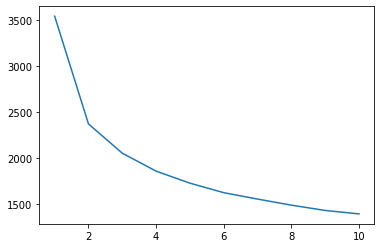

In [66]:
elbow_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    elbow_values.append([k, kmeans.inertia_])
elbow_df = pd.DataFrame(elbow_values, columns = ['K','Inertia'])
fig, ax = plt.subplots()
ax.plot(elbow_df['K'], elbow_df['Inertia'])

In [80]:
kmeans_2 = KMeans(n_clusters = 2)
kmeans_2.fit(x)
print(kmeans_2.inertia_)
labels_2 = kmeans_2.labels_
print(silhouette_score(x, labels_2))

2370.84182063365
0.2767972171676582


In [79]:
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(x)
print(kmeans_3.inertia_)
labels_3 = kmeans_3.labels_
print(silhouette_score(x, labels_3))

2051.5641413951507
0.19400802565169836


In [78]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(x)
print(kmeans_4.inertia_)
labels_4 = kmeans_4.labels_
print(silhouette_score(x, labels_4))

1855.657925326933
0.16482264355607976


In [81]:
kmeans_5 = KMeans(n_clusters = 5)
kmeans_5.fit(x)
print(kmeans_5.inertia_)
labels_5 = kmeans_5.labels_
print(silhouette_score(x, labels_5))

1720.1801302996817
0.15504341406244407


Text(0, 0.5, 'Distance')

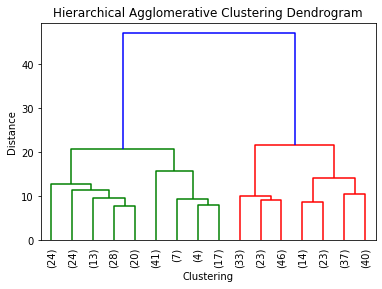

In [82]:
link = linkage(x, 'ward')
dendrogram(link, truncate_mode='lastp', p=16, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Clustering')
plt.ylabel('Distance')
